# 39. Уравнение $2^x = x^2$

Уравнение $2^x = x^2$ имеет $3$ вещественных решения.

1. Постройте графики функций $y=2^x$ и $y = x^2$ и убедитесь, что они пересекаются в 3 точках.
2. Найдите все 3 решения с помощью функции `scipy.optimize.brentq`. Можете воспользоваться другим методом. Обоснуйте свой выбор.
3. Выразите решения уравнения через функцию Ламберта (см. № 38). Найдите все три решения с помощью функции `scipy.special.lambertw`. Вам придется работать с комплексными значениями этой функции, чтобы получить вещественные корни исходного уравнения.
4. Сравните все подходы и сделайте выводы.

# 1Часть
1. Подключим все необходимые для работы библиотеки

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy.special import lambertw

2. Строим графики $2^x = x^2$ и обозначаем точки пересечения 2-х графиков

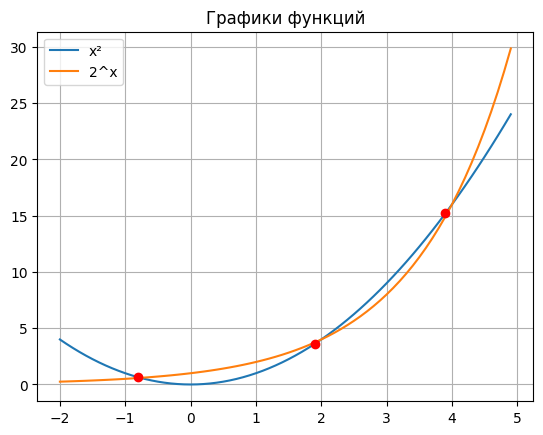

In [94]:
ln = 0.1
x = np.arange(-2.0, 5, ln)
y = x * x

x1 = np.arange(-2.0, 5, ln)
y1 = 2**x

fig = plt.figure()
plt.title('Графики функций')
plt.plot(x, y, label = "x\u00B2")
plt.plot(x1, y1, label = "2^x")
idx = np.argwhere(np.diff(np.sign(y1-y))).flatten()
plt.plot(x[idx], y[idx], 'ro')
plt.legend()
plt.grid()

# Часть 2
Находим все решения с помощью функции `scipy.optimize.brentq`

In [95]:
def function1(x):
    return x * x

def function2(x):
    return 2**x

print('x1 = ',optimize.brentq(lambda x: function1(x)-function2(x),-2,0))
print('x2 = ',optimize.brentq(lambda x: function1(x)-function2(x), 0, 3))
print('x3 = ',optimize.brentq(lambda x: function1(x)-function2(x), 3, 5))

x1 =  -0.7666646959621225
x2 =  2.0000000000000004
x3 =  4.0


# Часть 3
Для начала нужно преобразовать $2^x = x^2$ к функции Ламберта
<img alt="for_lab1" height="600" src="photo_lab1.jpg" width="400"/>
1. Для первого случая x>=0: k=1 и k=0
2. Для второго случая x<0: k = 1

In [96]:
x1 = -2*lambertw(np.log(2)/2,0)/np.log(2)

x2 = -2*lambertw(-np.log(2)/2,0)/np.log(2)

x3 = -2*lambertw(-np.log(2)/2,-1)/np.log(2)

print('x1 = ',x1.real,'\nx2 = ',x2.real,'\nx3 = ',x3.real)

x1 =  -0.766664695962123 
x2 =  1.9999999999999996 
x3 =  4.000000000000002


# Вывод

* Точность ответов в обоих случаях получилась очень высокая
* Погрешность между двумя вариантами решения уравнения очень маленькая